In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDSET /Lab/Lab_8/dataset 1.csv')
df.head()

,X1,X2
0,0.007486,2.420864
1,0.013216,2.112454
2,0.013879,2.122164
3,0.019414,1.756409
4,0.022808,2.342029


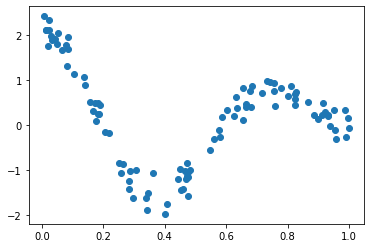

In [ ]:
plt.scatter(df.X1,df.X2)

In [ ]:
x = df[['X1']].to_numpy()
y = df[['X2']].to_numpy()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state = None)

for train_index, test_index in kf.split(x):
  print("Train:", train_index, "Validation:",test_index)
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly = PolynomialFeatures(degree = 2, include_bias = True)
  x_train_trans = poly.fit_transform(x_train)
  x_test_trans = poly.transform(x_test)

  


Train: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Validation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Validation: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Validation: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Train: [ 0  1  2  3  4

In [ ]:
x_train.shape

(80, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score



def polynomial_regression(degree):
  scores = []
  kf = KFold(n_splits=5, shuffle = True, random_state =2)

  for train_index, test_index in kf.split(x):
    # print("Train:", train_index, "Validation:",test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly = PolynomialFeatures(degree = 1, include_bias = True)
    x_train_trans = poly.fit_transform(x_train)
    x_test_trans = poly.transform(x_test)

    X_new = np.linspace(0,1,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    # # print(x_train_trans)
    polynomial_regression.fit(x_train_trans, y_train)

    # #for plot
    # y_newbig = polynomial_regression.predict(X_new_poly)
    # plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    # plt.plot(x_train, y_train, "b.", linewidth=3)
    # plt.plot(x_test, y_test, "g.", linewidth=3)
    # plt.legend(loc="upper left")
    # plt.xlabel("X")
    # plt.ylabel("y")
    # plt.axis([0, 1, -2, 4])
    # plt.show()
    # #for plot


    y_pred = polynomial_regression.predict(x_test_trans)
    scores.append(r2_score(y_test, y_pred))
  # print(scores)
  # print(np.average(scores))
  return np.average(scores)

In [ ]:
scores_for_degrees = []
for i in range(1,51):
  scores_for_degrees.append(polynomial_regression(i))
  

In [ ]:
for i in range(50):
  print("For degree", i+1, ":", scores_for_degrees[i])

For degree 1 : -0.14221300975161064
For degree 2 : 0.3708716498377843
For degree 3 : 0.8009715037512825
For degree 4 : 0.8528545380243779
For degree 5 : 0.9505909579220324
For degree 6 : 0.9501629749185152
For degree 7 : 0.9528732437623374
For degree 8 : 0.9516852875961057
For degree 9 : 0.9507014368200487
For degree 10 : 0.9504460447765067
For degree 11 : 0.9498083935873378
For degree 12 : 0.9473647879633293
For degree 13 : 0.9446851405778386
For degree 14 : 0.943602280622318
For degree 15 : 0.9443556796992064
For degree 16 : 0.9417747442142943
For degree 17 : 0.9369384974388144
For degree 18 : 0.9349590769546356
For degree 19 : 0.9301029609749228
For degree 20 : 0.9106801475279725
For degree 21 : 0.9098182829332023
For degree 22 : 0.9384632063442773
For degree 23 : 0.915340373986114
For degree 24 : 0.9295415068686577
For degree 25 : 0.9022208465797409
For degree 26 : 0.9250260749977954
For degree 27 : 0.884923622571535
For degree 28 : 0.8887283308194516
For degree 29 : 0.918842809934

In [ ]:
polynomial_regression(42)

0.2346595865404988